# RF



## Data Set 1

In [1]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd



In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)

# Load data from the new Google Drive link
file_id = "1qhCB1Dod6jeEsuKy5sNk4MNHSjtENSrx"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the data
df = pd.read_csv(download_url)

# Backup original DataFrame
df_backup = df.copy()
import pandas as pd
import pandas as pd

# Create datetime directly from differently named columns
df['Date'] = pd.to_datetime({
    'year': df['YEAR'],
    'month': df['MO'],
    'day': df['DY']
})
# Set Date as the index
df = df.set_index('Date')

# Drop unnecessary columns
df = df.drop(columns=["YEAR", "MO", "DY"])

# Display the DataFrame (optional in scripts)
print(df.head())

df

            WS10M_lag1   PREC     RH  MIN_TEMP  MAX_TEMP    WD_sin  \
Date                                                                 
2013-01-03        4.25  13.42  86.26     23.42     28.38  0.439939   
2013-01-04        4.75   8.79  86.31     22.93     27.58  0.424199   
2013-01-05        5.74   2.60  86.88     22.17     26.16  0.563526   
2013-01-06        5.79   1.65  88.09     23.47     27.75  0.460200   
2013-01-07        4.52  27.41  93.04     24.04     26.70  0.368125   

            SURF_PRESSSURE    WD_cos  AVG_TEMP  WS10M_lag2  PREC_lag1  \
Date                                                                    
2013-01-03           99.68  0.898028      26.4        3.99       1.09   
2013-01-04           99.65  0.905569      25.1        4.25      13.42   
2013-01-05           99.50  0.826098      26.9        4.75       8.79   
2013-01-06           99.47  0.887815      27.3        5.74       2.60   
2013-01-07           99.46  0.929776      25.9        5.79       1.65  

,WS10M_lag1,PREC,RH,MIN_TEMP,MAX_TEMP,WD_sin,SURF_PRESSSURE,WD_cos,AVG_TEMP,WS10M_lag2,PREC_lag1,SL_PRESSURE,WS10M
Date,,,,,,,,,,,,,
2013-01-03,4.25,13.42,86.26,23.42,28.38,0.439939,99.68,0.898028,26.4,3.99,1.09,1011.0,4.75
2013-01-04,4.75,8.79,86.31,22.93,27.58,0.424199,99.65,0.905569,25.1,4.25,13.42,1010.1,5.74
2013-01-05,5.74,2.60,86.88,22.17,26.16,0.563526,99.50,0.826098,26.9,4.75,8.79,1007.5,5.79
2013-01-06,5.79,1.65,88.09,23.47,27.75,0.460200,99.47,0.887815,27.3,5.74,2.60,1008.2,4.52
2013-01-07,4.52,27.41,93.04,24.04,26.70,0.368125,99.46,0.929776,25.9,5.79,1.65,1009.2,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,9.45,88.57,24.40,30.35,0.381070,99.66,0.924546,29.5,4.29,3.50,1011.0,6.43
2023-12-28,6.43,13.93,90.59,25.51,29.37,0.634731,99.58,0.772734,28.5,6.01,9.45,1010.9,3.93
2023-12-29,3.93,9.80,89.03,25.03,29.30,0.689620,99.69,0.724172,28.2,6.43,13.93,1011.4,2.59


In [3]:
df.columns

Index(['WS10M_lag1', 'PREC', 'RH', 'MIN_TEMP', 'MAX_TEMP', 'WD_sin',
       'SURF_PRESSSURE', 'WD_cos', 'AVG_TEMP', 'WS10M_lag2', 'PREC_lag1',
       'SL_PRESSURE', 'WS10M'],
      dtype='object')

In [4]:

df.columns
df

,WS10M_lag1,PREC,RH,MIN_TEMP,MAX_TEMP,WD_sin,SURF_PRESSSURE,WD_cos,AVG_TEMP,WS10M_lag2,PREC_lag1,SL_PRESSURE,WS10M
Date,,,,,,,,,,,,,
2013-01-03,4.25,13.42,86.26,23.42,28.38,0.439939,99.68,0.898028,26.4,3.99,1.09,1011.0,4.75
2013-01-04,4.75,8.79,86.31,22.93,27.58,0.424199,99.65,0.905569,25.1,4.25,13.42,1010.1,5.74
2013-01-05,5.74,2.60,86.88,22.17,26.16,0.563526,99.50,0.826098,26.9,4.75,8.79,1007.5,5.79
2013-01-06,5.79,1.65,88.09,23.47,27.75,0.460200,99.47,0.887815,27.3,5.74,2.60,1008.2,4.52
2013-01-07,4.52,27.41,93.04,24.04,26.70,0.368125,99.46,0.929776,25.9,5.79,1.65,1009.2,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,9.45,88.57,24.40,30.35,0.381070,99.66,0.924546,29.5,4.29,3.50,1011.0,6.43
2023-12-28,6.43,13.93,90.59,25.51,29.37,0.634731,99.58,0.772734,28.5,6.01,9.45,1010.9,3.93
2023-12-29,3.93,9.80,89.03,25.03,29.30,0.689620,99.69,0.724172,28.2,6.43,13.93,1011.4,2.59


## Data Sets

# 1

In [5]:

df

,WS10M_lag1,PREC,RH,MIN_TEMP,MAX_TEMP,WD_sin,SURF_PRESSSURE,WD_cos,AVG_TEMP,WS10M_lag2,PREC_lag1,SL_PRESSURE,WS10M
Date,,,,,,,,,,,,,
2013-01-03,4.25,13.42,86.26,23.42,28.38,0.439939,99.68,0.898028,26.4,3.99,1.09,1011.0,4.75
2013-01-04,4.75,8.79,86.31,22.93,27.58,0.424199,99.65,0.905569,25.1,4.25,13.42,1010.1,5.74
2013-01-05,5.74,2.60,86.88,22.17,26.16,0.563526,99.50,0.826098,26.9,4.75,8.79,1007.5,5.79
2013-01-06,5.79,1.65,88.09,23.47,27.75,0.460200,99.47,0.887815,27.3,5.74,2.60,1008.2,4.52
2013-01-07,4.52,27.41,93.04,24.04,26.70,0.368125,99.46,0.929776,25.9,5.79,1.65,1009.2,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,9.45,88.57,24.40,30.35,0.381070,99.66,0.924546,29.5,4.29,3.50,1011.0,6.43
2023-12-28,6.43,13.93,90.59,25.51,29.37,0.634731,99.58,0.772734,28.5,6.01,9.45,1010.9,3.93
2023-12-29,3.93,9.80,89.03,25.03,29.30,0.689620,99.69,0.724172,28.2,6.43,13.93,1011.4,2.59


In [6]:
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [7]:
# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]


In [8]:
numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
            WS10M_lag1   PREC     RH  MIN_TEMP  MAX_TEMP    WD_sin  \
Date                                                                 
2013-01-03        4.25  13.42  86.26     23.42     28.38  0.439939   
2013-01-04        4.75   8.79  86.31     22.93     27.58  0.424199   
2013-01-05        5.74   2.60  86.88     22.17     26.16  0.563526   
2013-01-06        5.79   1.65  88.09     23.47     27.75  0.460200   
2013-01-07        4.52  27.41  93.04     24.04     26.70  0.368125   

            SURF_PRESSSURE    WD_cos  AVG_TEMP  WS10M_lag2  PREC_lag1  \
Date                                                                    
2013-01-03           99.68  0.898028      26.4        3.99       1.09   
2013-01-04           99.65  0.905569      25.1        4.25      13.42   
2013-01-05           99.50  0.826098      26.9        4.75       8.79   
2013-01-06           99.47  0.887815      27.3        5.74       2.60   
2013-01-07           99.46  0.929776      25.9        5.79    

In [9]:
# Function to calculate evaluation metrics
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2


# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2


# CNN

## Original

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 14.9286 - val_loss: 1.4221
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0457 - val_loss: 0.8936
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7189 - val_loss: 0.7646
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6170 - val_loss: 0.6954
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5621 - val_loss: 0.6503
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5255 - val_loss: 0.6188
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4995 - val_loss: 0.5967
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4807 - val_loss: 0.5794
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4668 - val_loss: 0.5680
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4561 - val_loss: 0.5593
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4468 - val_loss: 0.5518
Epoch 12/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

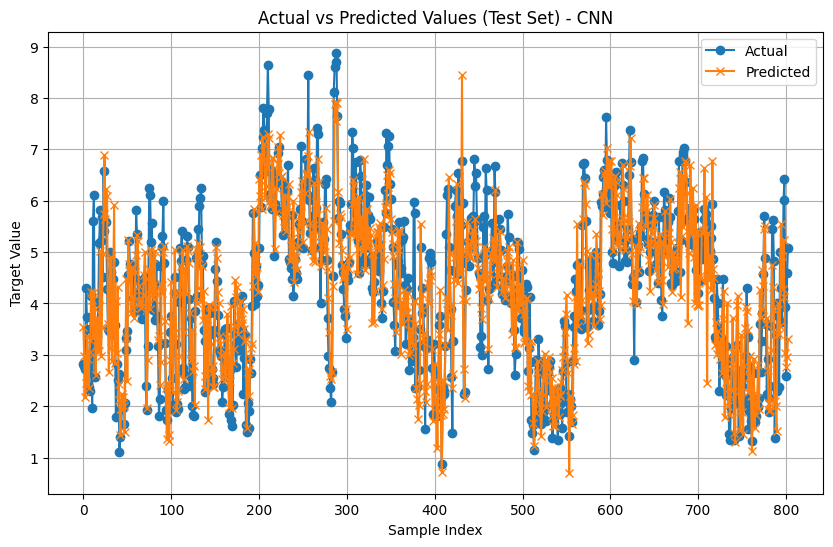

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf

# Set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Assuming you have these from before:
# X_train_sub, X_test_sub (with selected top features)
# y_train, y_test (target variables)
# ===== CRITICAL ADDITION: STANDARD SCALING =====
# ... [imports and seed setting] ...

# Standard Scaling
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Now a NumPy array
X_test_sub = scaler.transform(X_test)        # Now a NumPy array

# Reshape for Conv1D
X_train_cnn = np.expand_dims(X_train_sub, axis=1)  # Shape: [samples, 1, features]
X_test_cnn = np.expand_dims(X_test_sub, axis=1)     # Shape: [samples, 1, features]

# Convert targets to arrays
y_train_cnn = y_train.values
y_test_cnn = y_test.values



# Build CNN model
model = Sequential()
# Conv1D expects input shape = (timesteps, features)
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(Flatten())  # Flatten before Dense layers
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train_cnn, y_train_cnn,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict
y_train_pred_cnn = model.predict(X_train_cnn).flatten()
y_test_pred_cnn = model.predict(X_test_cnn).flatten()

# Evaluation function
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MSE = {mse:.4f}, MAE = {mae:.4f}, R² = {r2:.4f}")

print("\n--- CNN Evaluation ---")
evaluate(y_train_cnn, y_train_pred_cnn, label="Train (CNN)")
evaluate(y_test_cnn, y_test_pred_cnn, label="Test (CNN)")

# Comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test_cnn,
    'Predicted': y_test_pred_cnn
})

print(comparison_df.head(20))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_cnn, label='Actual', marker='o')
plt.plot(y_test_pred_cnn, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set) - CNN')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
!pip install scikeras


In [12]:
import sklearn, scikeras, tensorflow
print("scikit-learn:", sklearn.__version__)
print("scikeras:", scikeras.__version__)
print("tensorflow:", tensorflow.__version__)


scikit-learn: 1.6.1
scikeras: 0.13.0
tensorflow: 2.18.0


In [13]:
!pip install --force-reinstall --no-cache-dir numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 124.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 186.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 184.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 201.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 206.9 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found

## Grid Search

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.01; total time=   7.6s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.01; total time=  13.1s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.01; total time=  17.8s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.01; total time=  18.6s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.01; total time=  27.1s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.001; total time=   8.2s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, model__filters=32, model__learning_rate=0.001; total time=  13.3s
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.1, 

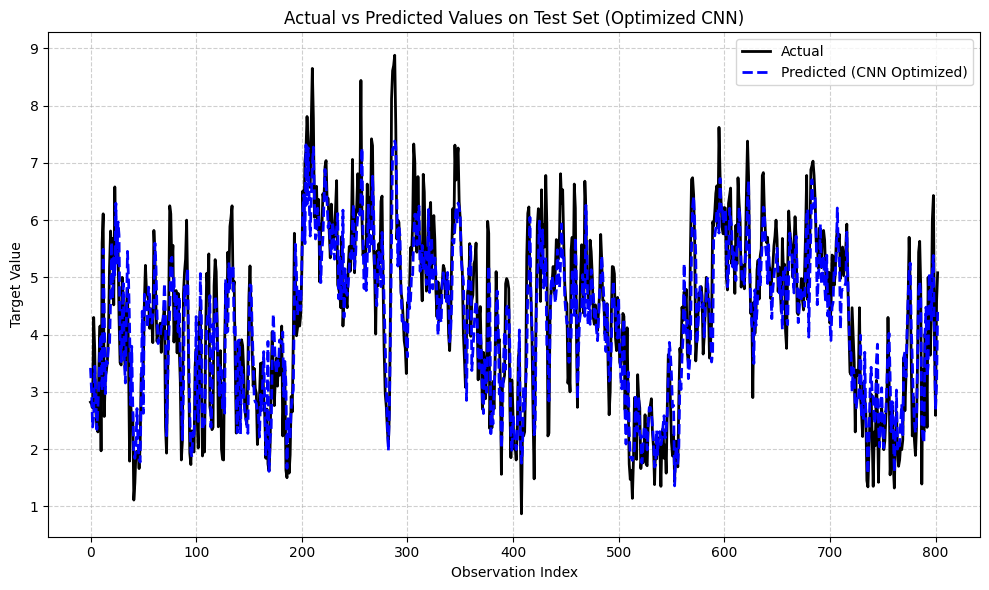

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor

from tensorflow.keras.optimizers import Adam
# Fix random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Standard Scaling
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Now a NumPy array
X_test_sub = scaler.transform(X_test)        # Now a NumPy array

# Reshape for Conv1D
X_train_cnn = np.expand_dims(X_train_sub, axis=1)  # Shape: [samples, 1, features]
X_test_cnn = np.expand_dims(X_test_sub, axis=1)     # Shape: [samples, 1, features]

# Convert targets to arrays
y_train_cnn = y_train.values
y_test_cnn = y_test.values


# Evaluation function (same as yours)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Build CNN model builder function for KerasRegressor
def build_cnn_model(filters=64, kernel_size=1, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(1, X_train.shape[1])))
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Wrap Keras model for sklearn compatibility
cnn_regressor = KerasRegressor(model=build_cnn_model, verbose=0)

# Parameter grid with correct scikeras prefixes
param_grid = {
    'model__filters': [32, 64, 128],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__learning_rate': [1e-2, 1e-3, 1e-4],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=cnn_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=1  # Parallelism with TF often causes issues
)

# Fit grid search (this will take time)
grid_search.fit(X_train_cnn, y_train)

print("\nBest Parameters found:")
print(grid_search.best_params_)

# Best model from grid search
best_cnn = grid_search.best_estimator_

# Predictions
y_train_pred = best_cnn.predict(X_train_cnn)
y_test_pred = best_cnn.predict(X_test_cnn)

print("\n--- Optimized CNN Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (CNN Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (CNN Optimized)")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (CNN Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized CNN)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Random Search

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=54, dropout_rate=0.33896289605806984, epochs=64, filters=126, learning_rate=0.007117219002454924; total time=  16.3s
[CV] END batch_size=54, dropout_rate=0.33896289605806984, epochs=64, filters=126, learning_rate=0.007117219002454924; total time=  16.5s
[CV] END batch_size=54, dropout_rate=0.33896289605806984, epochs=64, filters=126, learning_rate=0.007117219002454924; total time=  16.0s
[CV] END batch_size=36, dropout_rate=0.14680559213273095, epochs=132, filters=94, learning_rate=0.004233240027692805; total time=  36.6s
[CV] END batch_size=36, dropout_rate=0.14680559213273095, epochs=132, filters=94, learning_rate=0.004233240027692805; total time=  35.2s
[CV] END batch_size=36, dropout_rate=0.14680559213273095, epochs=132, filters=94, learning_rate=0.004233240027692805; total time=  36.7s
[CV] END batch_size=51, dropout_rate=0.14286004537658223, epochs=52, filters=72, learning_rate=0.008829188669457947; 

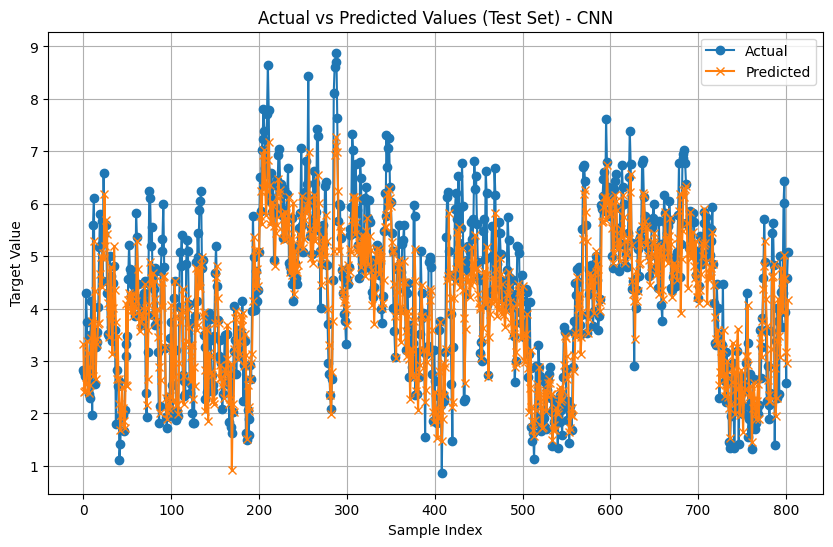

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint, uniform
import tensorflow as tf
import random

# Fix random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Standard Scaling
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Now a NumPy array
X_test_sub = scaler.transform(X_test)        # Now a NumPy array

# Reshape for Conv1D
X_train_cnn = np.expand_dims(X_train_sub, axis=1)  # Shape: [samples, 1, features]
X_test_cnn = np.expand_dims(X_test_sub, axis=1)     # Shape: [samples, 1, features]

# Convert targets to arrays
y_train_cnn = y_train.values
y_test_cnn = y_test.values


# Define CNN model builder function for KerasRegressor
def create_cnn_model(filters=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])))
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Wrap model for sklearn compatibility
from scikeras.wrappers import KerasRegressor

cnn_regressor = KerasRegressor(
    model=create_cnn_model,
    verbose=0,
    filters=64,
    dropout_rate=0.2,
    learning_rate=0.001
)

# Define hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'filters': randint(20, 151),
    'dropout_rate': uniform(0.1, 0.3),
    'learning_rate': uniform(1e-4, 9e-3),
    'batch_size': randint(16, 65),
    'epochs': randint(50, 151)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cnn_regressor,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    random_state=RANDOM_SEED,
    verbose=2,
    n_jobs=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_cnn, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Predict on train and test sets using best estimator
y_train_pred_cnn = random_search.predict(X_train_cnn)
y_test_pred_cnn = random_search.predict(X_test_cnn)

# Evaluation function
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MSE = {mse:.4f}, MAE = {mae:.4f}, R² = {r2:.4f}")

print("\n--- CNN Evaluation ---")
evaluate(y_train, y_train_pred_cnn, label="Train (CNN)")
evaluate(y_test, y_test_pred_cnn, label="Test (CNN)")

# Create a DataFrame to compare actual and predicted values on test set
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_cnn
})

print(comparison_df.head(20))

# Plot actual vs predicted for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_test_pred_cnn, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set) - CNN')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


## optuna

[I 2025-07-23 09:52:13,530] A new study created in memory with name: no-name-94c32822-ad9c-44d8-82a2-7383f4a5100d


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 09:55:23,135] Trial 0 finished with value: 0.593078574339364 and parameters: {'batch_size': 32, 'epochs': 110, 'filters': 40, 'dropout_rate': 0.16239780813448107, 'learning_rate': 0.00013066739238053285}. Best is trial 0 with value: 0.593078574339364.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 09:57:41,877] Trial 1 finished with value: 0.5640619361430643 and parameters: {'batch_size': 16, 'epochs': 52, 'filters': 147, 'dropout_rate': 0.4329770563201687, 'learning_rate': 0.00026587543983272726}. Best is trial 1 with value: 0.5640619361430643.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 09:59:42,612] Trial 2 finished with value: 0.5869952322849954 and parameters: {'batch_size': 64, 'epochs': 103, 'filters': 76, 'dropout_rate': 0.21649165607921678, 'learning_rate': 0.0016738085788752138}. Best is trial 1 with value: 0.5640619361430643.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 10:01:33,234] Trial 3 finished with value: 0.5557720652355281 and parameters: {'batch_size': 64, 'epochs': 96, 'filters': 122, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.0010677482709481358}. Best is trial 3 with value: 0.5557720652355281.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[I 2025-07-23 10:02:51,906] Trial 4 finished with value: 1.4508690628858443 and parameters: {'batch_size': 64, 'epochs': 67, 'filters': 28, 'dropout_rate': 0.4795542149013333, 'learning_rate': 0.00853618986286683}. Best is trial 3 with value: 0.5557720652355281.



Best Trial:
FrozenTrial(number=3, state=1, values=[0.5557720652355281], datetime_start=datetime.datetime(2025, 7, 23, 9, 59, 42, 614049), datetime_complete=datetime.datetime(2025, 7, 23, 10, 1, 33, 234559), params={'batch_size': 64, 'epochs': 96, 'filters': 122, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.0010677482709481358}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'batch_size': CategoricalDistribution(choices=(16, 32, 64)), 'epochs': IntDistribution(high=150, log=False, low=50, step=1), 'filters': IntDistribution(high=150, log=False, low=20, step=1), 'dropout_rate': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'learning_rate': FloatDistribution(high=0.01, log=True, low=0.0001, step=None)}, trial_id=3, value=None)

Best Parameters:
{'batch_size': 64, 'epochs': 96, 'filters': 122, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.0010677482709481358}
Epoch 1/96
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16.7963
Epoch 2/

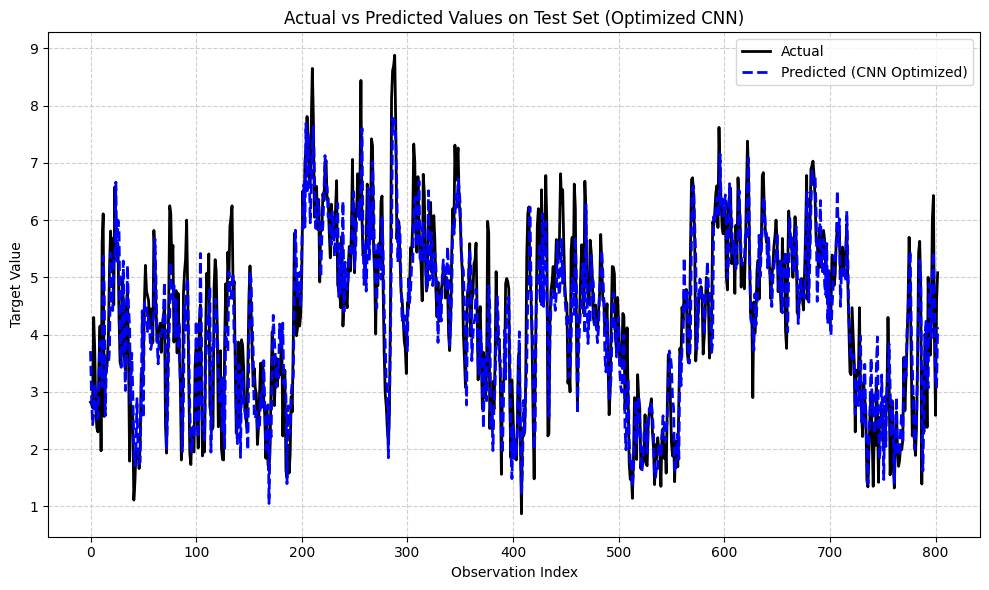

In [12]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ===== CRITICAL ADDITION: STANDARD SCALING =====
# Standard Scaling
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Now a NumPy array
X_test_sub = scaler.transform(X_test)        # Now a NumPy array

# Reshape for Conv1D
X_train_cnn = np.expand_dims(X_train_sub, axis=1)  # Shape: [samples, 1, features]
X_test_cnn = np.expand_dims(X_test_sub, axis=1)     # Shape: [samples, 1, features]

# Convert targets to arrays
y_train_cnn = y_train.values
y_test_cnn = y_test.values



# Fix random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)



# Evaluation function (same as you used)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Build CNN model function for Optuna
def create_cnn_model(trial):
    filters = trial.suggest_int('filters', 20, 150)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])))
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Optuna objective for CNN
def cnn_objective(trial):
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    epochs = trial.suggest_int('epochs', 50, 150)

    model = create_cnn_model(trial)

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_cnn):
        X_t, X_v = X_train_cnn[train_idx], X_train_cnn[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        history = model.fit(
            X_t, y_t,
            validation_data=(X_v, y_v),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0,
            shuffle=False
        )
        preds = model.predict(X_v).flatten()
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Create and run Optuna study
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
study.optimize(cnn_objective, n_trials=30, timeout=600)

print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit final model on full train data with best params
best_params = study.best_params

final_model = Sequential()
final_model.add(Conv1D(filters=best_params['filters'], kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])))
final_model.add(Flatten())
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(50, activation='relu'))
final_model.add(Dense(1))
optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='mse', optimizer=optimizer)

final_model.fit(
    X_train_cnn, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1,
    shuffle=False
)

# Predict
y_train_pred = final_model.predict(X_train_cnn).flatten()
y_test_pred = final_model.predict(X_test_cnn).flatten()

print("\n--- Optimized CNN Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (CNN Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (CNN Optimized)")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (CNN Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized CNN)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
